# EDA - Russia Real Estate 2018-2021

## 1. Download and describe data

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

pd.options.mode.chained_assignment = None  # отключаем предупреждения Pandas

Upload dataset, link to the source: https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021

In [4]:
aparts = pd.read_csv('all_v2.csv')

In [5]:
aparts.head(10)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1
6,4704280,2018-03-04,12:35:25,55.621097,37.431002,3,2,1,25,1,31.7,6.0,11
7,3600000,2018-03-04,20:52:38,59.875526,30.395457,2661,1,2,5,1,31.1,6.0,1
8,3390000,2018-03-05,07:07:05,53.195031,50.106952,3106,2,4,24,2,64.0,13.0,11
9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1


In [6]:
# info about dataset
aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


### Features and data types

**Categorical features:**
- **Region** (numerically encoded geographical area, identifies either a large city like Moscow or Saint Petersburg or a federal region / district)
- **Building type** (numerically encoded type of building materials: 0 - Other, 1 - Panel, 2 - Monolithic, 3 - Brick, 4 - Blocky, 5 - Wooden)
- **Object type** (apartment type: 1 - secondary real estate market, 11 - new building)

**Numerical features:**
- **Area** (total floor area of the apartment in sq. meters)
- **Kitchen area** (kitchen area in sq. meters)
- **Rooms** (number of rooms in the apartment, -1 stands for studios with open-space layout)
- **Level** (floor the apartment is located on, could be treated as a categorical feature as well)
- **Levels** (total number of storeys in the building)

**Geospatial features:**
- **Latitude** (geographical coordinate of the preperty)
- **Longitude** (geographical coordinate of the preperty)

**Temporal features:**
- **Date** (date the listing was published)
- **Time** (exact time the listing was published)

-------

## 2. Clear and prepare data

In [7]:
aparts.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


**Dataset contains errors and outliers:**
- Negative price
- Too expansive flats (more than 2 billions rubles)
- Rooms "-2" without definition
- Unrealy small flats (less than 1 square meters)
- Kitchen area is more than total area

In [8]:
# calculate 99-percentile for price, area and kitchen area (99% of selection)
print("Min price:", np.percentile(aparts['price'], 1))
print("Max price:", np.percentile(aparts['price'], 99))
print("Min area:", np.percentile(aparts['area'], 1))
print("Max area:", np.percentile(aparts['area'], 99))
print("Min kitchen area:", np.percentile(aparts['kitchen_area'], 1))
print("Max kitchen area:", np.percentile(aparts['kitchen_area'], 99))

Min price: 750000.0
Max price: 24100000.0
Min area: 19.8
Max area: 138.2
Min kitchen area: 2.0
Max kitchen area: 30.5


**Limit data by parameters which cover the majority of apartments**

In [9]:
# limit price
min_price = 750000 
max_price = 30000000

# limit area
min_area = 20  
max_area = 140

# limit kitchen area
min_kitchen = 2 
max_kitchen = 30

In [10]:
# select flats by price limit
aparts = aparts[(aparts['price'] <= max_price) & (aparts['price'] >= min_price)]

# select flats by area limit 
aparts = aparts[(aparts['area'] <= max_area) & (aparts['area'] >= min_area)]

# select flats by kitchen area limit 
aparts = aparts[(aparts['kitchen_area'] <= max_kitchen) & (aparts['kitchen_area'] >= min_kitchen)]

# delete data where kitchen area is more than total area
aparts = aparts[aparts['area'] > aparts['kitchen_area']]

# replace -1 and -2 on 0 for studios 
aparts['rooms'] = aparts['rooms'].apply(lambda x: x if x > 0 else 0)

**Check clearing data result**

In [11]:
aparts.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06,5.244511e+06
mean,3.998659e+06,5.400872e+01,5.331684e+01,4.323543e+03,1.937034e+00,6.247051e+00,1.146507e+01,1.768445e+00,5.251934e+01,1.033744e+01,3.984381e+00
std,3.317454e+06,4.616269e+00,2.075884e+01,3.308654e+03,1.035054e+00,4.946453e+00,6.507705e+00,9.200799e-01,1.911572e+01,4.392703e+00,4.575728e+00
min,7.500000e+05,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+01,2.000000e+00,1.000000e+00
25%,1.960000e+06,5.336503e+01,3.779475e+01,2.661000e+03,1.000000e+00,3.000000e+00,5.000000e+00,1.000000e+00,3.860000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.515787e+01,4.344519e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.730000e+06,5.616522e+01,6.651436e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.300000e+01,1.240000e+01,1.100000e+01
max,3.000000e+07,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,9.000000e+00,1.400000e+02,3.000000e+01,1.100000e+01


**Check dublicates**

In [12]:
aparts.duplicated().sum()

1498

In [13]:
# delete dublicates
aparts = aparts[aparts.duplicated() == False]
aparts.duplicated().sum()

0

**Check blanks**

In [14]:
aparts.isnull().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

**Add Region name columns**

In [15]:
# info in columns Region
print(aparts['region'].info())

<class 'pandas.core.series.Series'>
Int64Index: 5243013 entries, 0 to 5477005
Series name: region
Non-Null Count    Dtype
--------------    -----
5243013 non-null  int64
dtypes: int64(1)
memory usage: 80.0 MB
None


In [19]:
# unique values
print(aparts['region'].unique())

# create numpy array with region values
regs = np.array(aparts['region'])

[ 2661    81  2871  2843     3  3106  2922  2900  2722  6171  3230  4417
  5282  5368  3446  5520  6817  9579  2604  1010  9648  7793 13919  2860
  3019  4982  5241  3870  3991  2359  9654  2072  8090  4007 11171 10160
  7873  2594  8509 11416 11991  5178 13913  6309  5952  6543  2880  5993
  2484  4240  5789 14880  1491  2885  5794  2528  4374  4695  2328  5143
  6937  2806 14368  5736  7121  4086   821 10582  7896  8640  5703 10201
  4249  3153  4189  2814 13098  8894  7929 16705    69  4963  1901 61888]


Using search by geographical coordinates ('geo_lat', 'geo_lon') find all values in dictionary 'region_name' in accordance with region code ('region') in the table

In [20]:
region_name = {                     
    2661: 'Санкт-Петербург',
    3446: 'Ленинградская область', 
    3: 'Москва',
    81: 'Московская область',
    2843: 'Краснодарский край',
    2871: 'Нижегородская область',
    3230: 'Ростовская область',
    3106: 'Самарская область',
    2922: 'Республика Татарстан',
    2900: 'Ставропольский край',
    2722: 'Республика Башкортостан',
    6171: 'Свердловская область', 
    4417: 'Республика Коми', 
    5282: 'Челябинская область', 
    5368: 'Иркутская область', 
    5520: 'Пермский край', 
    6817: 'Алтайский край',
    9579: 'Республика Бурятия',
    2604: 'Ярославская область',
    1010: 'Удмуртская Республика',
    7793: 'Псковская область',
    13919: 'Республика Северная Осетия — Алания',
    2860: 'Кемеровская область',
    3019: 'Чувашская Республика',
    4982: 'Республика Марий Эл',
    9648: 'Кабардино-Балкарская Республика',
    5241: 'Республика Мордовия',
    3870: 'Красноярский край',
    3991: 'Тюменская область',
    2359: 'Республика Хакасия',
    9654: 'Новосибирская область',
    2072: 'Воронежская область',
    8090: 'Республика Карелия',
    4007: 'Республика Дагестан',
    11171: 'Республика Саха (Якутия)',
    10160: 'Забайкальский край',
    7873: 'Республика Крым',
    6937: 'Республика Крым',
    2594: 'Кировская область',
    8509: 'Республика Калмыкия',
    11416: 'Республика Адыгея',
    11991: 'Карачаево-Черкесская Республика',
    5178: 'Республика Тыва',
    13913: 'Республика Ингушетия',
    6309: 'Республика Алтай',
    5952: 'Белгородская область',
    6543: 'Архангельская область',
    2880: 'Тверская область',
    5993: 'Пензенская область',
    2484: 'Ханты-Мансийский автономный округ',
    4240: 'Липецкая область',
    5789: 'Владимирская область',
    14880: 'Ямало-Ненецкий автономный округ',
    1491: 'Рязанская область',
    2885: 'Чеченская Республика',
    5794: 'Смоленская область',
    2528: 'Саратовская область',
    4374: 'Вологодская область',
    4695: 'Волгоградская область',
    2328: 'Калужская область',
    5143: 'Тульская область',
    2806: 'Тамбовская область',
    14368: 'Мурманская область',
    5736: 'Новгородская область',
    7121: 'Курская область',
    4086: 'Хабаровский край',
    821: 'Брянская область',
    10582: 'Астраханская область',
    7896: 'Калининградская область',
    8640: 'Омская область',
    5703: 'Курганская область',
    10201: 'Томская область',
    4249: 'Ульяновская область',
    3153: 'Оренбургская область',
    4189: 'Костромская область',
    2814: 'Орловская область',
    13098: 'Камчатский край',
    8894: 'Ивановская область',
    7929: 'Амурская область',
    16705: 'Магаданская область',
    69: 'Еврейская автономная область',
    4963: 'Приморский край',
    1901: 'Сахалинская область',
    61888: 'Ненецкий автономный округ'
}

In [21]:
print(len(region_name))
print(len(aparts['region'].unique()))

84
84


In [22]:
# check missing values
for reg in aparts['region'].unique():
    if reg not in region_name:
        print(reg)
print('Done')      

Done


In [23]:
# create series
reg_names = pd.Series(region_name)
reg_names

2661                  Санкт-Петербург
3446            Ленинградская область
3                              Москва
81                 Московская область
2843               Краснодарский край
                     ...             
16705             Магаданская область
69       Еврейская автономная область
4963                  Приморский край
1901              Сахалинская область
61888       Ненецкий автономный округ
Length: 84, dtype: object

Add new column with region name

In [24]:
aparts['region_name'] = aparts['region'].map(region_name)
aparts.head(10)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,region_name
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1,Санкт-Петербург
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,Московская область
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1,Нижегородская область
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11,Краснодарский край
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,Московская область
5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1,Московская область
6,4704280,2018-03-04,12:35:25,55.621097,37.431002,3,2,1,25,1,31.7,6.0,11,Москва
7,3600000,2018-03-04,20:52:38,59.875526,30.395457,2661,1,2,5,1,31.1,6.0,1,Санкт-Петербург
8,3390000,2018-03-05,07:07:05,53.195031,50.106952,3106,2,4,24,2,64.0,13.0,11,Самарская область
9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1,Московская область


In [25]:
# final data description
aparts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5243013 entries, 0 to 5477005
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
 13  region_name    object 
dtypes: float64(4), int64(7), object(3)
memory usage: 600.0+ MB


In [26]:
aparts.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06,5.243013e+06
mean,3.998031e+06,5.400828e+01,5.331910e+01,4.323850e+03,1.937100e+00,6.246332e+00,1.146361e+01,1.768478e+00,5.251895e+01,1.033713e+01,3.982773e+00
std,3.316410e+06,4.616495e+00,2.075908e+01,3.308588e+03,1.035086e+00,4.945813e+00,6.506917e+00,9.200801e-01,1.911445e+01,4.392549e+00,4.575019e+00
min,7.500000e+05,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+01,2.000000e+00,1.000000e+00
25%,1.960000e+06,5.336467e+01,3.779568e+01,2.661000e+03,1.000000e+00,3.000000e+00,5.000000e+00,1.000000e+00,3.860000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.515744e+01,4.344792e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.728090e+06,5.616522e+01,6.655145e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.300000e+01,1.240000e+01,1.100000e+01
max,3.000000e+07,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,9.000000e+00,1.400000e+02,3.000000e+01,1.100000e+01


-------

## 3. Data analysis

**1. Select one region for further analysis - Moscow region**

In [27]:
# select data
aparts_msk = aparts[aparts['region_name'] == "Московская область"]

In [28]:
aparts_msk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490990 entries, 1 to 5476996
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          490990 non-null  int64  
 1   date           490990 non-null  object 
 2   time           490990 non-null  object 
 3   geo_lat        490990 non-null  float64
 4   geo_lon        490990 non-null  float64
 5   region         490990 non-null  int64  
 6   building_type  490990 non-null  int64  
 7   level          490990 non-null  int64  
 8   levels         490990 non-null  int64  
 9   rooms          490990 non-null  int64  
 10  area           490990 non-null  float64
 11  kitchen_area   490990 non-null  float64
 12  object_type    490990 non-null  int64  
 13  region_name    490990 non-null  object 
dtypes: float64(4), int64(7), object(3)
memory usage: 56.2+ MB


In [29]:
aparts_msk.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,4.909900e+05,490990.000000,490990.000000,490990.0,490990.000000,490990.000000,490990.000000,490990.000000,490990.000000,490990.000000,490990.000000
mean,4.725005e+06,55.727550,37.784171,81.0,1.931496,7.048922,12.730817,1.782796,51.374044,10.270399,3.422351
std,2.408330e+06,0.316999,0.551936,0.0,0.879207,5.697716,7.368486,0.844519,17.812904,4.182235,4.284362
min,7.500000e+05,54.324219,35.339229,81.0,0.000000,1.000000,1.000000,0.000000,20.000000,2.000000,1.000000
25%,3.000000e+06,55.570845,37.449445,81.0,1.000000,3.000000,5.000000,1.000000,38.000000,7.000000,1.000000
50%,4.300000e+06,55.746237,37.840315,81.0,2.000000,5.000000,12.000000,2.000000,46.500000,9.700000,1.000000
75%,5.950000e+06,55.910578,38.023216,81.0,3.000000,10.000000,17.000000,2.000000,61.900000,12.000000,1.000000
max,3.000000e+07,56.898722,40.072223,81.0,5.000000,36.000000,39.000000,9.000000,140.000000,30.000000,11.000000


**2. Consider correlation matrix**

In [30]:
aparts_msk.corr()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
price,1.000000,0.074636,-0.241377,NaN,-0.116349,0.316170,0.454119,0.422795,0.646653,0.490754,0.129411
geo_lat,0.074636,1.000000,-0.202621,NaN,0.044401,0.040977,0.062788,-0.020801,0.016393,0.032019,0.033160
geo_lon,-0.241377,-0.202621,1.000000,NaN,0.048137,-0.102850,-0.153459,0.004147,-0.064943,-0.121989,-0.114051
region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
building_type,-0.116349,0.044401,0.048137,NaN,1.000000,-0.162344,-0.244653,-0.031291,-0.050776,-0.130810,-0.119982
level,0.316170,0.040977,-0.102850,NaN,-0.162344,1.000000,0.681638,-0.062374,0.096276,0.311622,0.313364
levels,0.454119,0.062788,-0.153459,NaN,-0.244653,0.681638,1.000000,-0.094454,0.139826,0.451553,0.433352
rooms,0.422795,-0.020801,0.004147,NaN,-0.031291,-0.062374,-0.094454,1.000000,0.811185,0.142264,-0.084384
area,0.646653,0.016393,-0.064943,NaN,-0.050776,0.096276,0.139826,0.811185,1.000000,0.443801,-0.006114
kitchen_area,0.490754,0.032019,-0.121989,NaN,-0.130810,0.311622,0.451553,0.142264,0.443801,1.000000,0.356255


<AxesSubplot:>

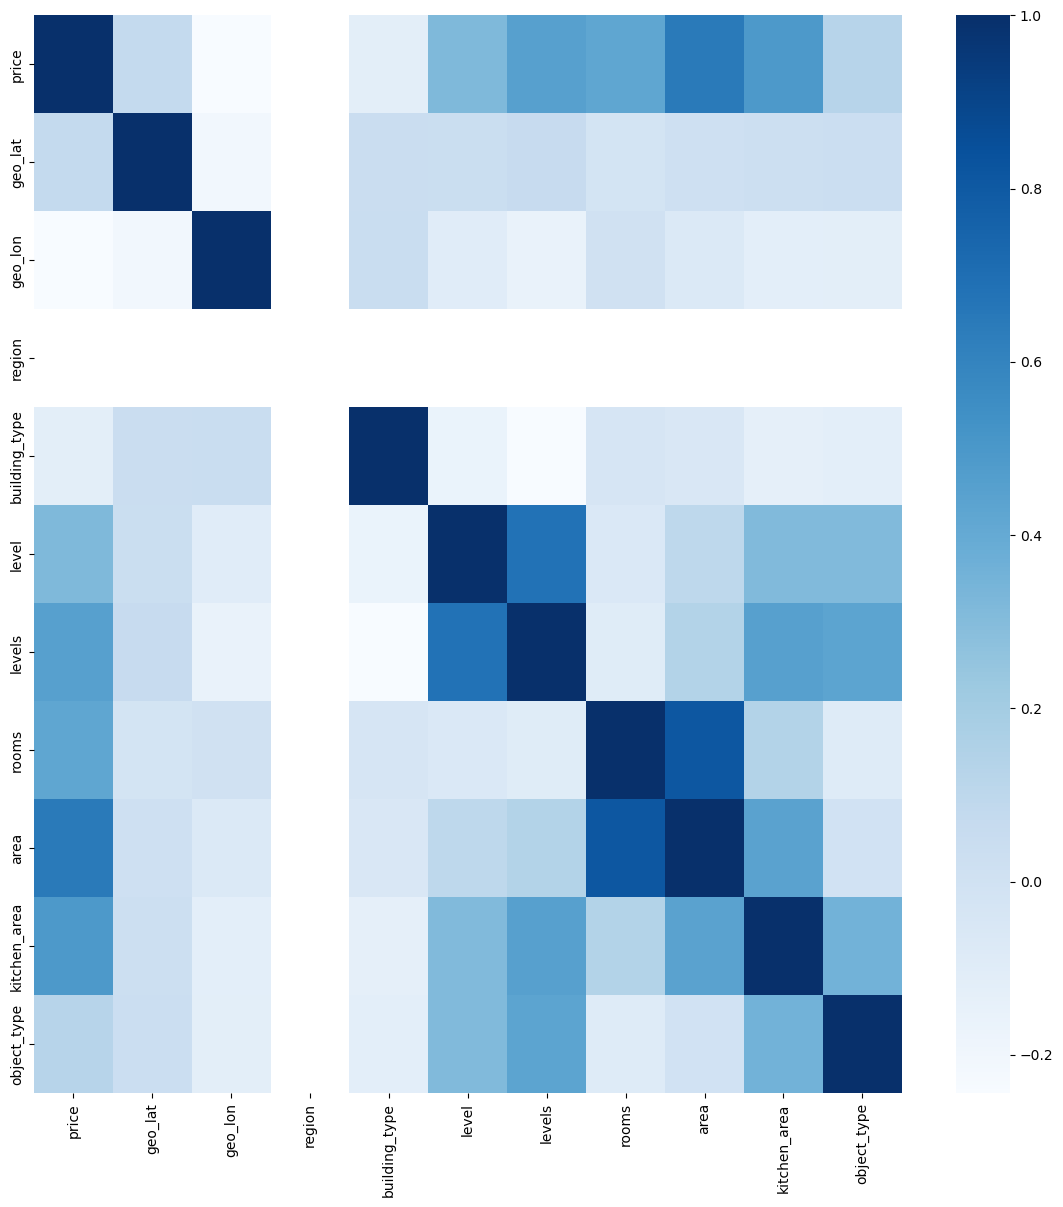

In [31]:
# build heatmap of correlation
plt.figure(figsize=(14, 14))

sns.heatmap(aparts_msk.corr(), cmap="Blues")

Price correlates with area, rooms and level.

**3. Show data distribution for area, price, room, level**

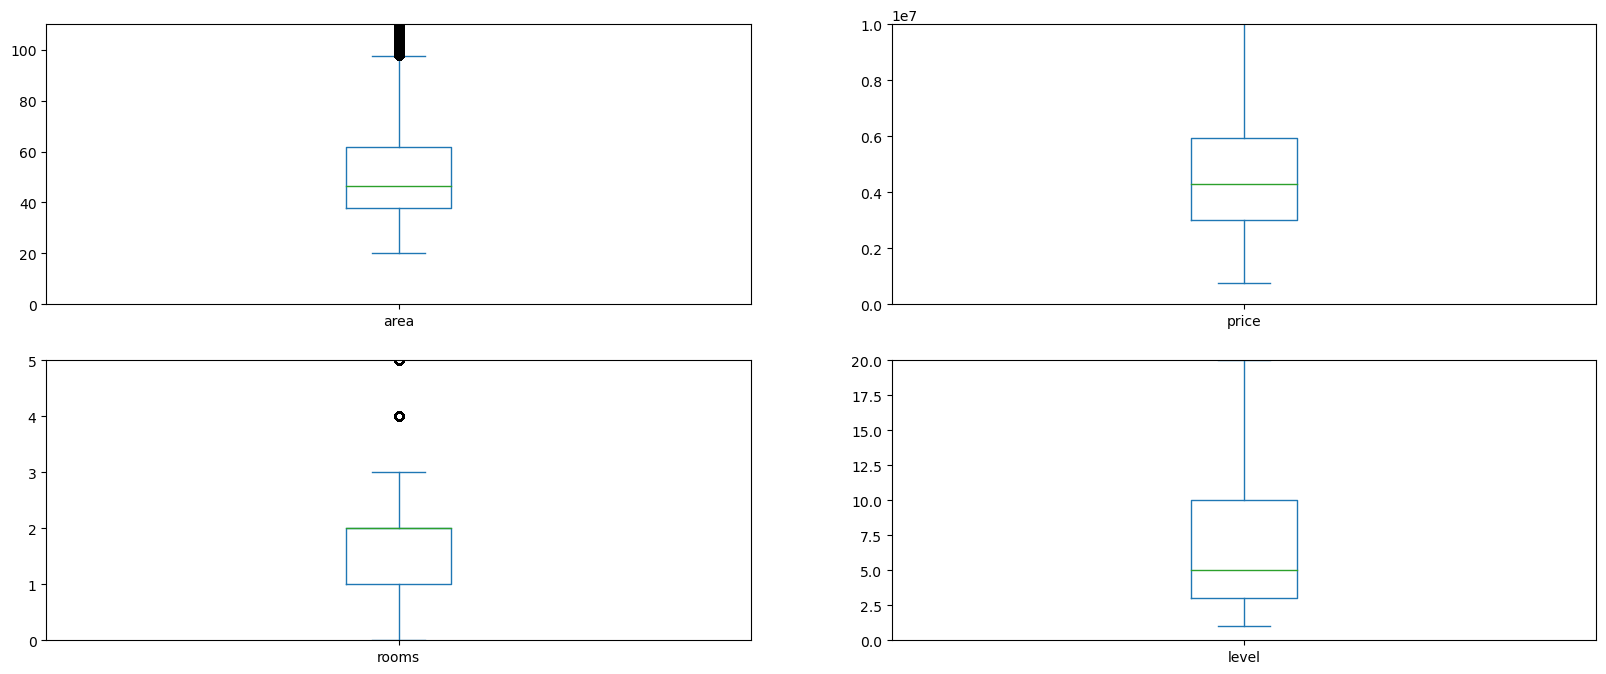

In [32]:
column_list1 = ['area', 'price', 'rooms', 'level']
ax = aparts_msk[column_list1].plot(kind='box', subplots=True, layout=(2,2), figsize=(20,8))

# limit axis Y
ylims = [110, 10000000, 5, 20]

for i in range(len(column_list1)):
    ax[column_list1[i]].set_ylim(0, ylims[i])

**4. Show ads qty by month**

In [37]:
# change type for 'date' from str to datetime
aparts_msk['date'] = pd.to_datetime(aparts_msk['date'])
aparts_msk['month'] = aparts_msk['date'].apply(lambda date: date.month) 

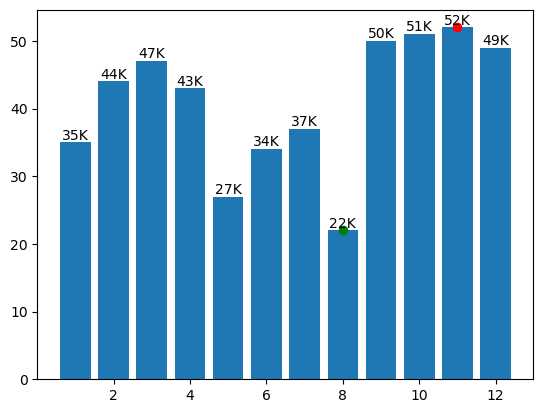

In [38]:
ads = round(aparts_msk.groupby('month')['region'].count()/1000, 0)

bar_ads = plt.bar(ads.index, ads)
plt.bar_label(bar_ads, fmt='%.0fK')

# min and max of ads quantity
min_ads = ads.min()
max_ads = ads.max()

# find the months in accordnace to min/max 
min_ads_day = ads[ads == min_ads]
max_ads_day = ads[ads == max_ads]

plt.scatter(min_ads_day.index, min_ads, color='g')
plt.scatter(max_ads_day.index, max_ads, color='r')

plt.show()

Offers decrease in the summer months from May to August.

**5. Vizualize ads quantity for whole period grouped by month**

In [42]:
aparts_msk['year'] = aparts_msk['date'].apply(lambda date: date.year)

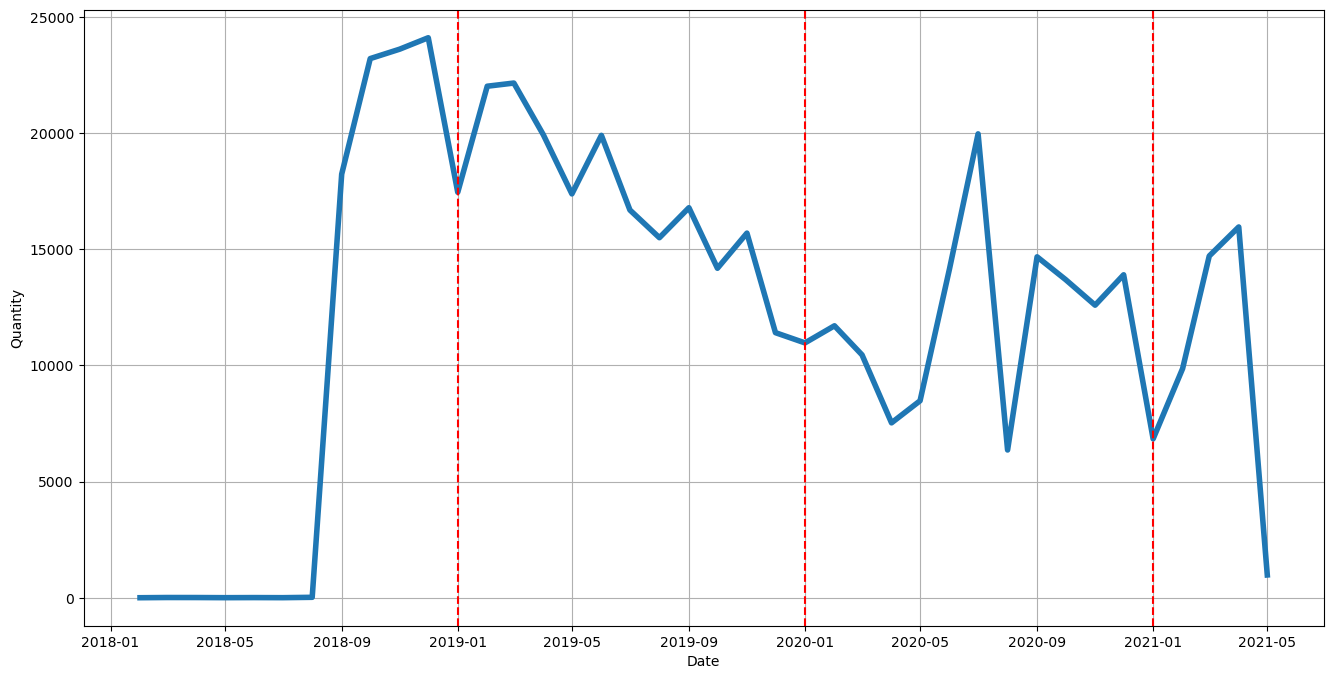

In [43]:
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 1, 1)
xlabels = np.arange('2018-02-01', '2021-06-01', dtype='datetime64[M]')

ax.plot(xlabels, aparts_msk.groupby(['year', 'month'])['region'].count(), linewidth=4)
ax.grid(True)
ax.axvline(x=datetime(2019,1,1), color='r', linestyle='--')
ax.axvline(x=datetime(2020,1,1), color='r', linestyle='--')
ax.axvline(x=datetime(2021,1,1), color='r', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Quantity')
plt.show()

There is no trend of seasonality in the offers numbers of apartments.

**6. Calculate dependance of price on date of plecement**

In [49]:
# get price for square meter
aparts_msk['price_per_meter'] = round(aparts_msk['price'] / aparts_msk['area'], 2)

In [50]:
aparts_msk.head(10)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,region_name,month,year,price_per_meter
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,Московская область,2,2018,125180.90
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,Московская область,3,2018,90833.33
5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1,Московская область,3,2018,103125.00
9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1,Московская область,3,2018,50909.09
10,6909880,2018-03-06,18:34:48,55.913950,37.707712,81,1,9,14,3,76.1,8.8,11,Московская область,3,2018,90800.00
11,4291950,2018-03-06,18:37:27,55.913950,37.707712,81,1,10,14,1,40.3,11.0,11,Московская область,3,2018,106500.00
12,6675840,2018-03-06,18:37:28,55.913950,37.707712,81,1,25,25,3,73.2,12.4,11,Московская область,3,2018,91200.00
13,6522650,2018-03-06,18:37:35,55.913950,37.707712,81,1,5,14,3,68.3,12.1,11,Московская область,3,2018,95500.00
14,6522650,2018-03-06,18:37:40,55.913950,37.707712,81,1,7,14,3,68.3,12.1,11,Московская область,3,2018,95500.00
15,4279770,2018-03-06,18:40:08,55.781715,37.856656,81,2,7,15,1,36.3,16.6,11,Московская область,3,2018,117900.00


In [51]:
month_growth = pd.DataFrame()

In [52]:
aparts_msk.sort_values(by='date')

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,region_name,month,year,price_per_meter
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,Московская область,2,2018,125180.90
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,Московская область,3,2018,90833.33
5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1,Московская область,3,2018,103125.00
9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1,Московская область,3,2018,50909.09
10,6909880,2018-03-06,18:34:48,55.913950,37.707712,81,1,9,14,3,76.1,8.8,11,Московская область,3,2018,90800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5471000,7732800,2021-05-01,10:24:43,55.796389,37.938283,81,2,15,16,2,53.0,11.8,11,Московская область,5,2021,145901.89
5471001,5132050,2021-05-01,10:24:44,55.545913,37.590000,81,1,19,25,0,21.0,5.6,11,Московская область,5,2021,244383.33
5471002,4150000,2021-05-01,10:24:44,55.743897,36.871728,81,2,1,17,1,32.0,8.5,1,Московская область,5,2021,129687.50
5471085,7530720,2021-05-01,10:28:44,55.796389,37.938283,81,2,13,16,2,54.0,20.5,11,Московская область,5,2021,139457.78


In [53]:
# average square meter price by year and month
month_growth = aparts_msk.groupby(['year', 'month'], as_index=False).agg({'price_per_meter': 'mean'})
# percentage change from month to month
month_growth['pct_change'] = month_growth['price_per_meter'].pct_change()

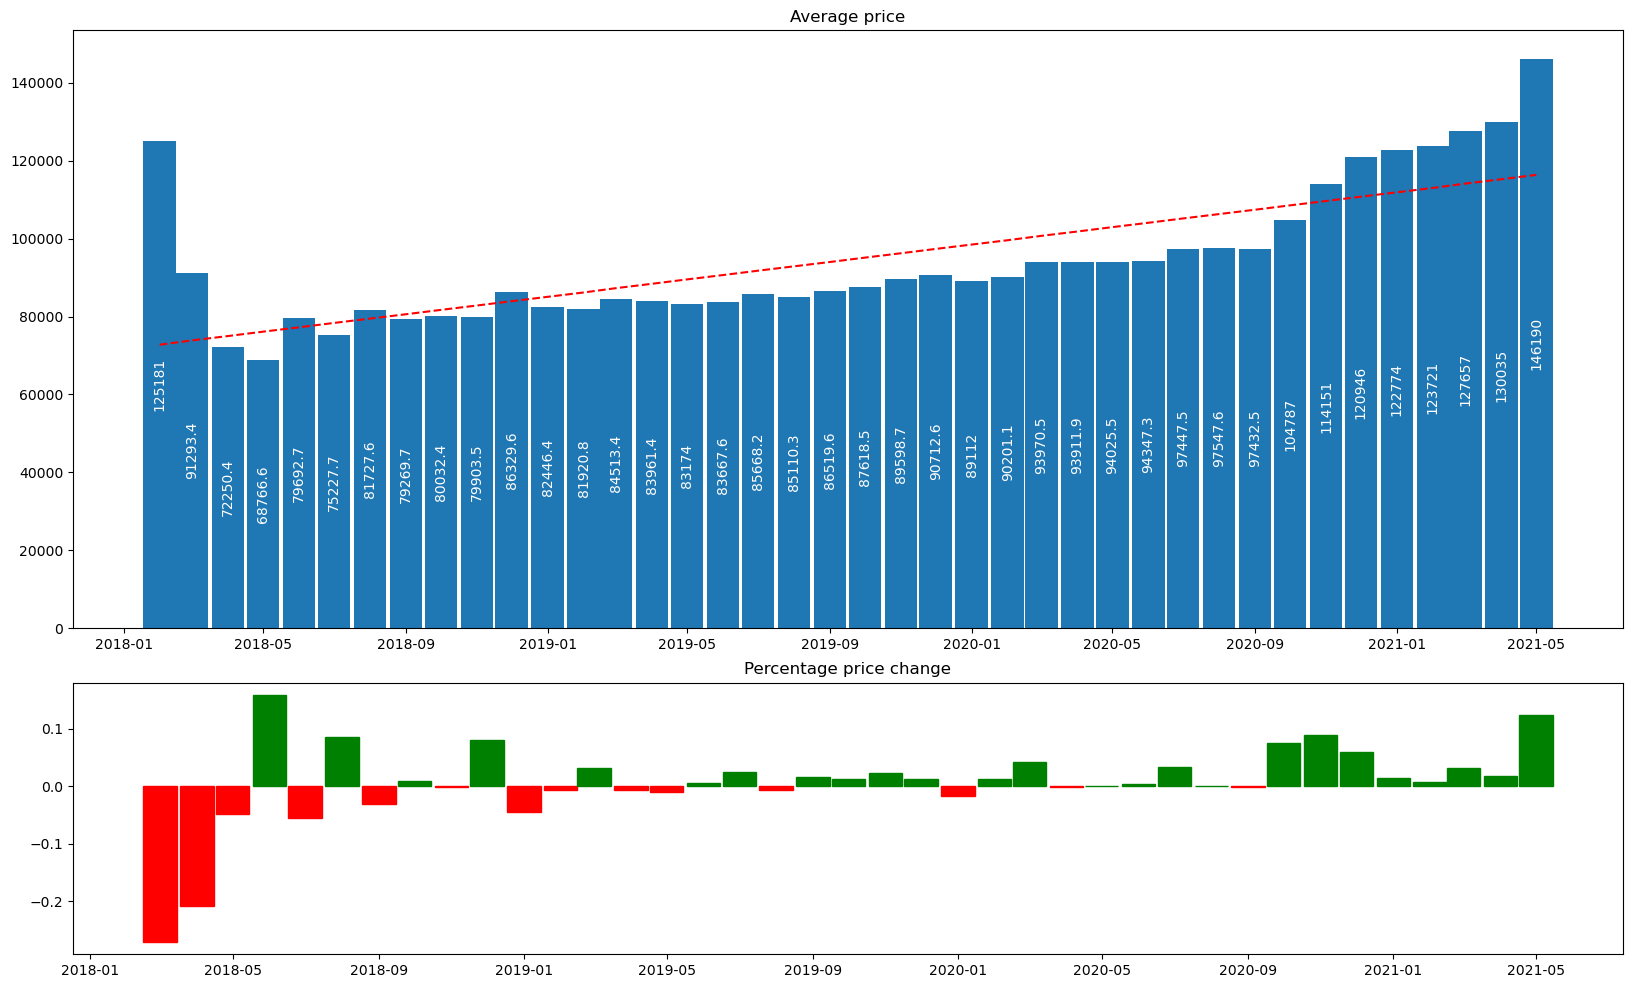

In [55]:
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(nrows=3, ncols=1)

xlabels = np.arange('2018-02-01', '2021-06-01', dtype='datetime64[M]')

facecolors = ['green' if y > 0 else 'red' for y in month_growth['pct_change']]
edgecolors = facecolors

ax1 = fig.add_subplot(gs[2:, :])
ax1.bar(xlabels, month_growth['pct_change'], color=facecolors, edgecolor=edgecolors, width=1)
ax1.set_title('Percentage price change')

ax2 = fig.add_subplot(gs[:2, :])
label2 = ax2.bar(xlabels, month_growth['price_per_meter'], width=1)
ax2.set_title('Average price')
ax2.bar_label(label2, label_type='center', color='white', rotation='vertical')

# добавим линию тренда на график
a, b = np.polyfit(month_growth.index, month_growth['price_per_meter'], deg=1)
y_est = a * month_growth.index + b
ax2.plot(xlabels, y_est, color='r', linestyle="--") 

plt.show()

Since 2018 the average cost per square meter has been rising steadily.

**7. Calculate dependance of price on rooms, area and level**


In [56]:
# avg price by rooms
room_growth = pd.DataFrame()
room_growth = aparts_msk.groupby(['rooms'], as_index=False).agg({'price_per_meter': 'mean'})
room_growth['price_per_meter'] = round(room_growth['price_per_meter'], 0)

# avg area by rooms
area_by_room = pd.DataFrame()
area_by_room = aparts_msk.groupby(['rooms'], as_index=False).agg({'area': 'mean'})
area_by_room['area'] = round(area_by_room['area'], 0)

# avg price by area
area_growth = pd.DataFrame()
aparts_msk['round_area'] = round(aparts_msk['area'], -1)
area_growth = aparts_msk.groupby(['round_area'], as_index=False).agg({'price_per_meter': 'mean'})
area_growth['price_per_meter'] = round(area_growth['price_per_meter'], 0)

# avg price by level
level_growth = pd.DataFrame()
level_growth = aparts_msk.groupby(['level'], as_index=False).agg({'price_per_meter': 'mean'})
level_growth['price_per_meter'] = round(level_growth['price_per_meter'], 0)

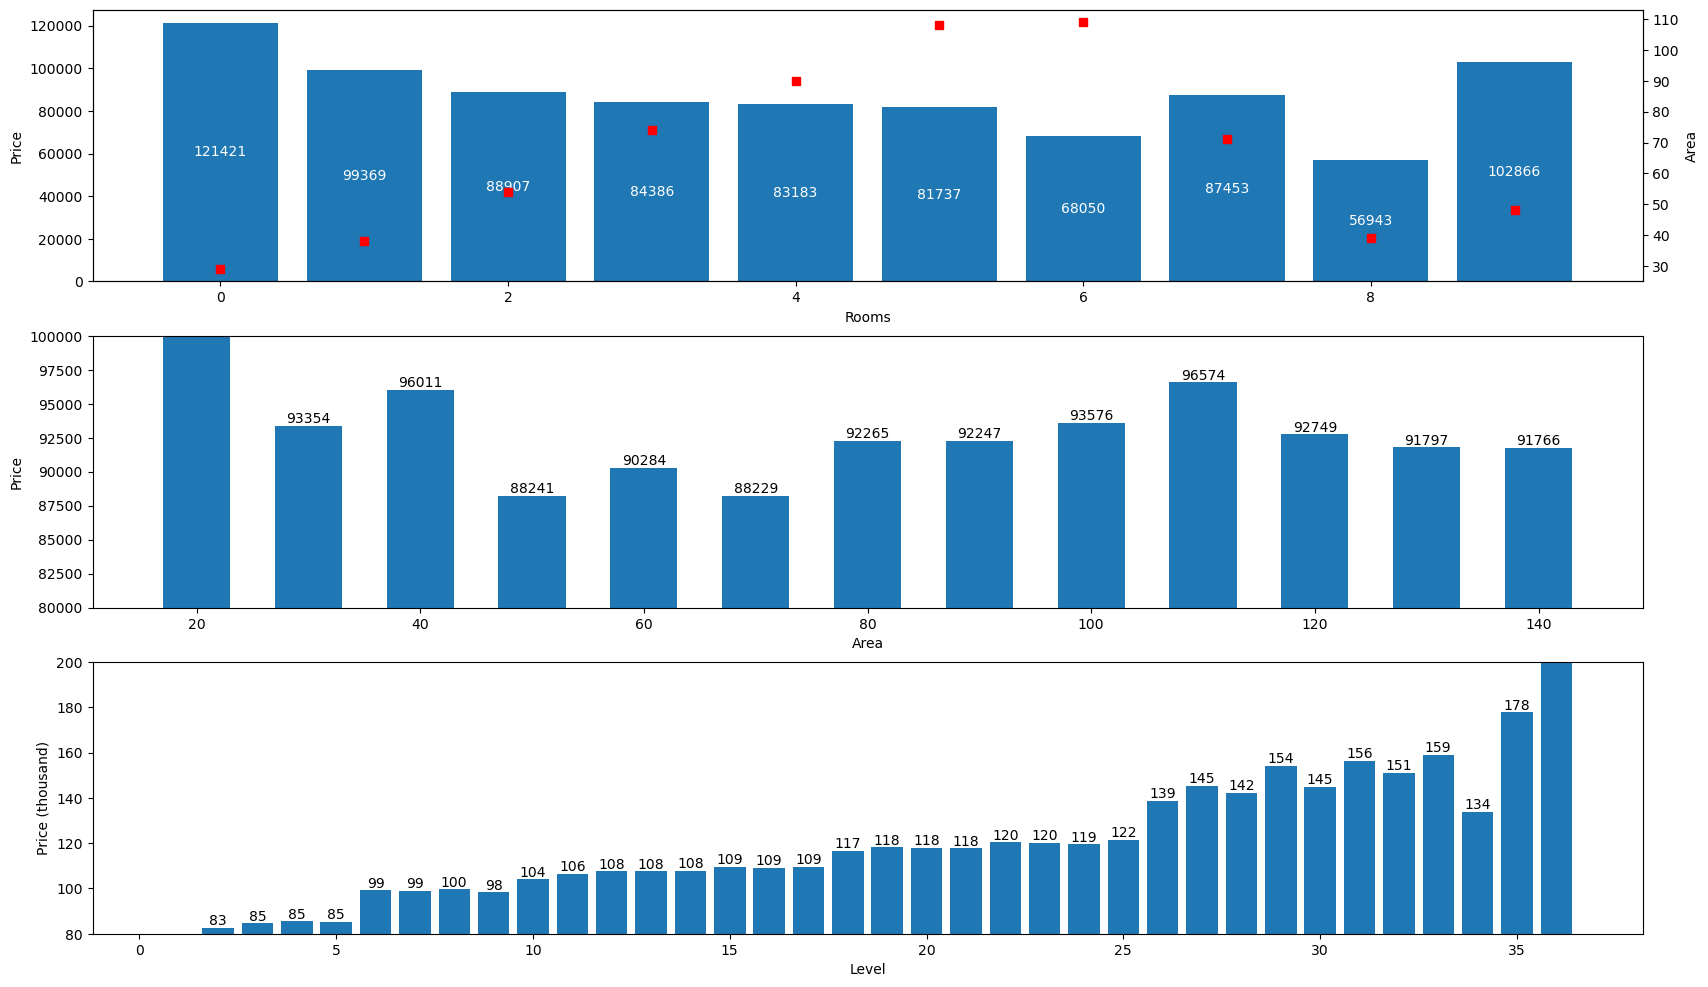

In [57]:
fig = plt.figure(figsize=(20, 12))

ax1 = fig.add_subplot(311)
label_price_room = ax1.bar(room_growth.index, room_growth['price_per_meter'])
ax1.bar_label(label_price_room, label_type='center', color='white')
ax1.set_ylabel('Price')
ax1.set_xlabel('Rooms')

ax11 = ax1.twinx()
label_area_room = ax11.scatter(area_by_room.index, area_by_room['area'], marker='s', color='r')
ax11.set_ylabel('Area')

ax2 = fig.add_subplot(312)
label_price_area = ax2.bar(area_growth['round_area'], area_growth['price_per_meter'], width=6)
ax2.bar_label(label_price_area)
ax2.set_ylabel('Price')
ax2.set_xlabel('Area')
plt.ylim (80000, 100000)

ax3 = fig.add_subplot(313)
label_price_level = ax3.bar(level_growth['level'], level_growth['price_per_meter']/1000, width=0.8)
ax3.bar_label(label_price_level, fmt='%.0f')
ax3.set_ylabel('Price (thousand)')
ax3.set_xlabel('Level')

plt.ylim (80, 200)
plt.show()

The more rooms the lower price per square meter. Prices for objects having 7 or more rooms are excluded from the general trend. 

Let's discover them in more detail.

In [58]:
# Records number of aparts with more than 7 rooms
aparts_msk[aparts_msk['rooms']>=7].shape[0]

18

In [59]:
# Look at them
aparts_msk[aparts_msk['rooms']>=7].head(20)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,region_name,month,year,price_per_meter,round_area
14703,4200000,2018-09-10,13:58:50,55.913319,36.876120,81,3,5,9,9,64.0,7.0,1,Московская область,9,2018,65625.00,60.0
654849,4000000,2018-12-04,14:06:38,55.081219,38.774327,81,3,9,9,9,68.0,12.0,1,Московская область,12,2018,58823.53,70.0
704091,2500000,2018-12-10,17:17:38,55.533150,37.620815,81,2,7,8,9,21.6,5.0,1,Московская область,12,2018,115740.74,20.0
1002301,7000000,2019-01-25,14:02:48,55.876077,37.399101,81,1,19,25,7,58.4,17.0,1,Московская область,1,2019,119863.01,60.0
1143026,3550000,2019-02-13,21:28:13,54.877480,37.216968,81,3,9,9,9,49.0,8.0,1,Московская область,2,2019,72448.98,50.0
1923523,4298620,2019-06-03,08:16:22,55.642708,37.859280,81,2,7,17,7,45.7,12.2,11,Московская область,6,2019,94061.71,50.0
2481709,3800000,2019-08-31,20:11:34,55.980387,37.133264,81,1,11,12,9,60.0,12.0,1,Московская область,8,2019,63333.33,60.0
2800039,2198000,2019-10-30,06:33:22,55.981716,37.281413,81,1,2,8,8,38.6,12.6,1,Московская область,10,2019,56943.01,40.0
3146715,4200000,2020-01-17,15:51:43,55.450694,37.741357,81,3,7,17,7,48.0,12.0,11,Московская область,1,2020,87500.00,50.0
3181277,2400000,2020-01-25,13:19:41,56.079639,37.930872,81,3,3,4,9,30.8,6.0,1,Московская область,1,2020,77922.08,30.0


Aparts having more than 7 rooms are very small and the area of objects is unreally small for mentioned rooms.



-------

## 4. Conclusion

The selected dataset for Moscow region consist of **490,990 records**. The data is preprocessed in such a way as to eliminate outliers and save the most realistic records, **covering 99% of real estate objects**.

**Main points:**
* An apartment price highly likely correlates with the total area, number of rooms and level in the building.
* The dynamics of offers in the real estate market are not stable. There is no seasonality trend in apartment sales from year to year. There is **decrease in offers** in the summer months **from May to August**.
* Since 2018 the average price per square meter has been continuously growing.
* The more rooms the lower price per square meter. This is true for the number of rooms from 1 to 6 inclusive.
* The dependence of price on the area can be divided into 2 conventional segments: up to 40 m2 and from 50 m2.
    - an apartment **up to 40 m2** inclusive costs above the regional average **92 thousand rubles** for square meter and usually presents studios and one-room apartments.
    - an apartment **from 50 m2** costs from **88 thousand rubles** for square meter and become more expensive as the total growth.
* As well the price directly depends on the floor of the apartment - **the higher floor, the more expensive the property**.